<a href="https://colab.research.google.com/github/AY1895/Enhancing-Student-Performance-Prediction/blob/main/Enhancing_Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

In [16]:
# Load the dataset
file_path = "/content/student.xlsx"
loan_data = pd.read_excel(file_path)

In [17]:
# Function for feature engineering
def create_interaction_terms(data):
    data['study_time_interaction'] = data['studytime'] * data['G2']
    return data

In [18]:
# Function to split data into training and testing sets
def split_data(data, proportion):
    np.random.seed(123)  # For reproducibility
    train_data, test_data = train_test_split(data, train_size=proportion, random_state=123)
    return train_data, test_data

In [19]:
# Function to plot box plot
def plot_boxplot(data, x, y, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x, y=y, color='skyblue')
    plt.title(title)
    plt.show()

In [21]:
# Load and preprocess data
data = loan_data.copy()

In [22]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print(data.describe(include='all'))
print("\nFirst few rows:")
print(data.head())
print("\nData types:")
print(data.dtypes)

       language school   sex          age address famsize Pstatus  \
count      1044   1044  1044  1044.000000    1044    1044    1044   
unique        2      2     2          NaN       2       2       2   
top         por     GP     F          NaN       U     GT3       T   
freq        649    772   591          NaN     759     738     923   
mean        NaN    NaN   NaN    16.726054     NaN     NaN     NaN   
std         NaN    NaN   NaN     1.239975     NaN     NaN     NaN   
min         NaN    NaN   NaN    15.000000     NaN     NaN     NaN   
25%         NaN    NaN   NaN    16.000000     NaN     NaN     NaN   
50%         NaN    NaN   NaN    17.000000     NaN     NaN     NaN   
75%         NaN    NaN   NaN    18.000000     NaN     NaN     NaN   
max         NaN    NaN   NaN    22.000000     NaN     NaN     NaN   

               Medu         Fedu   Mjob  ...       famrel     freetime  \
count   1044.000000  1044.000000   1044  ...  1044.000000  1044.000000   
unique          NaN    

In [23]:
# Check for missing values
print("\nMissing values per column:")
print(data.isna().sum())



Missing values per column:
language      0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [24]:
# Proportional table for G3
print("\nProportional table for G3:")
print(data['G3'].value_counts(normalize=True).sort_index())


Proportional table for G3:
G3
0     0.050766
1     0.000958
4     0.000958
5     0.007663
6     0.017241
7     0.018199
8     0.064176
9     0.060345
10    0.146552
11    0.144636
12    0.098659
13    0.108238
14    0.086207
15    0.078544
16    0.049808
17    0.033525
18    0.025862
19    0.006705
20    0.000958
Name: proportion, dtype: float64


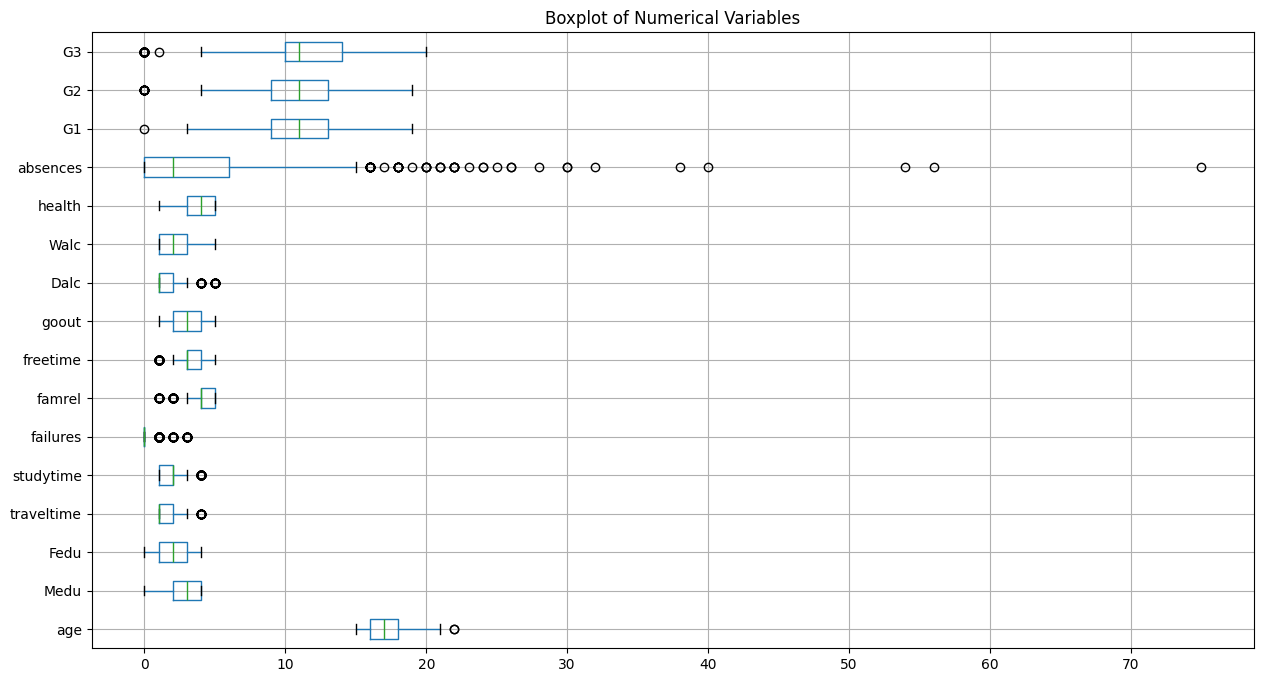

In [25]:
# Visualizations
# Boxplot of numerical variables
# Exclude non-numeric and non-relevant columns
numeric_cols = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 8))
data[numeric_cols].boxplot(vert=False)
plt.title('Boxplot of Numerical Variables')
plt.show()

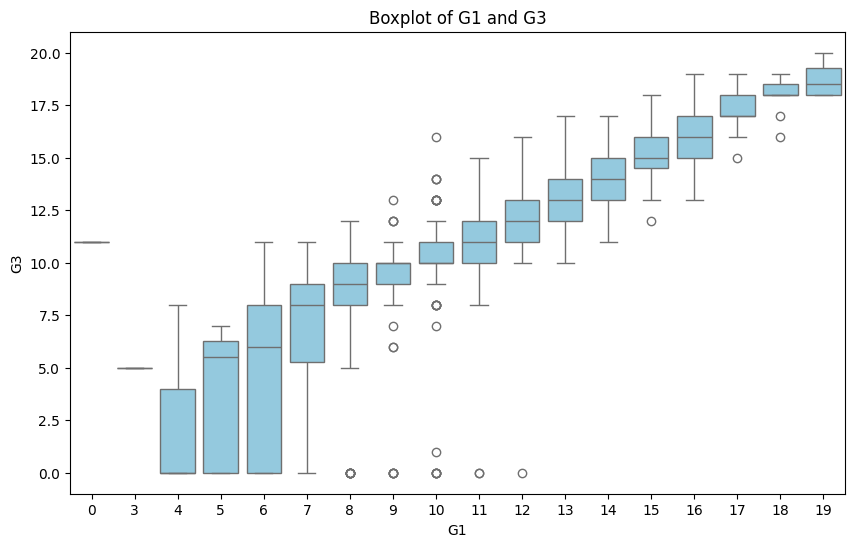

In [26]:
# Boxplot of G1 and G3
plot_boxplot(data, 'G1', 'G3', 'Boxplot of G1 and G3')

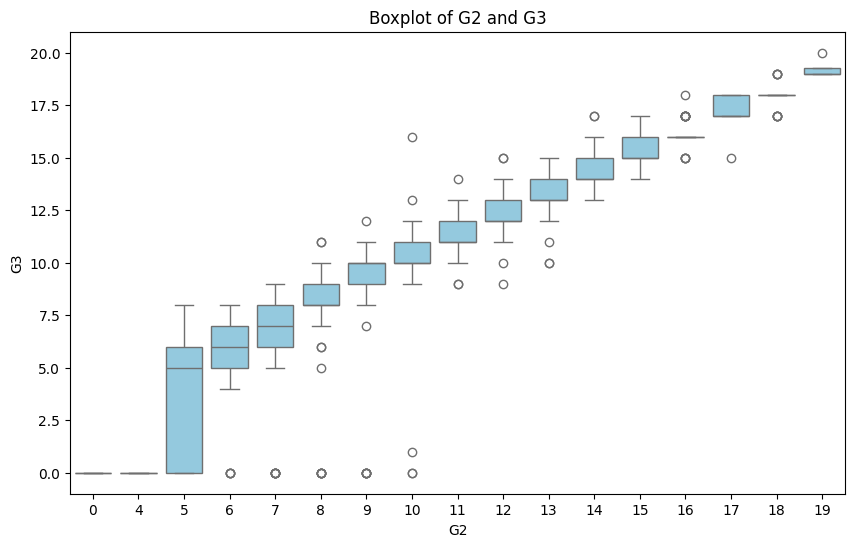

In [27]:
# Boxplot of G2 and G3
plot_boxplot(data, 'G2', 'G3', 'Boxplot of G2 and G3')

In [28]:
# Normalize data for box plots
scaler = StandardScaler()
normalized_data = data.copy()
normalized_data[numeric_cols] = scaler.fit_transform(normalized_data[numeric_cols])

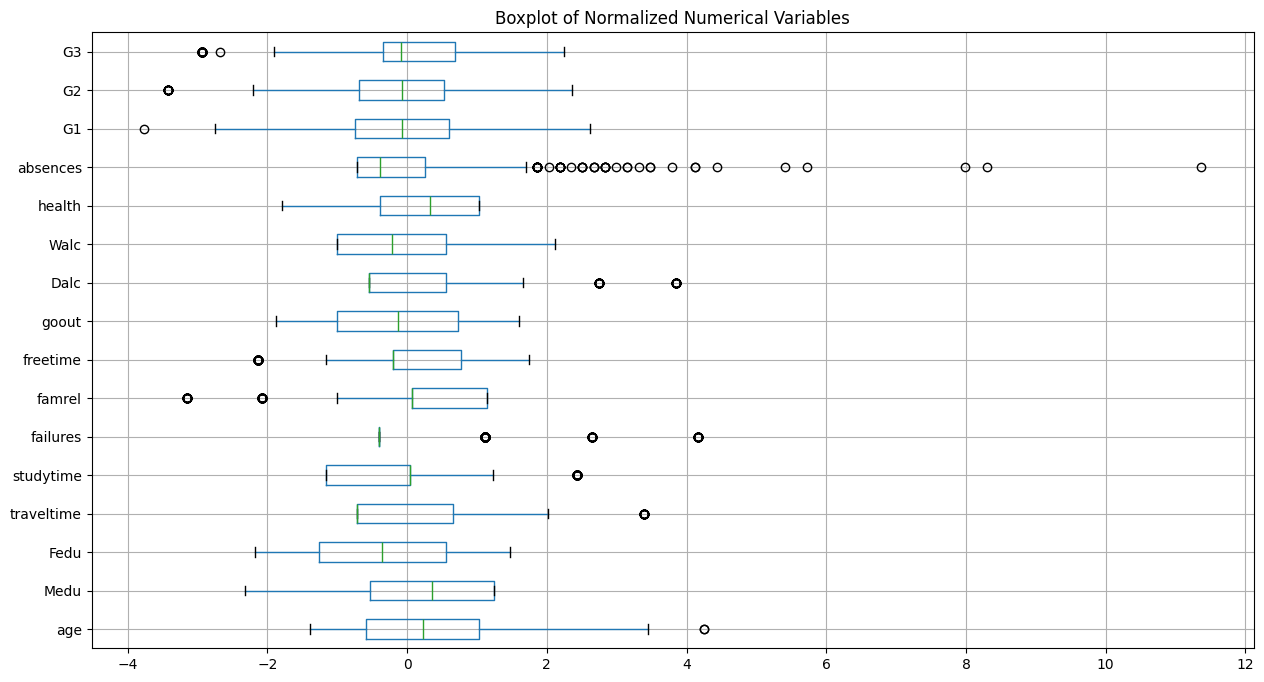

In [29]:
# Boxplot of normalized numerical variables
plt.figure(figsize=(15, 8))
normalized_data[numeric_cols].boxplot(vert=False)
plt.title('Boxplot of Normalized Numerical Variables')
plt.show()


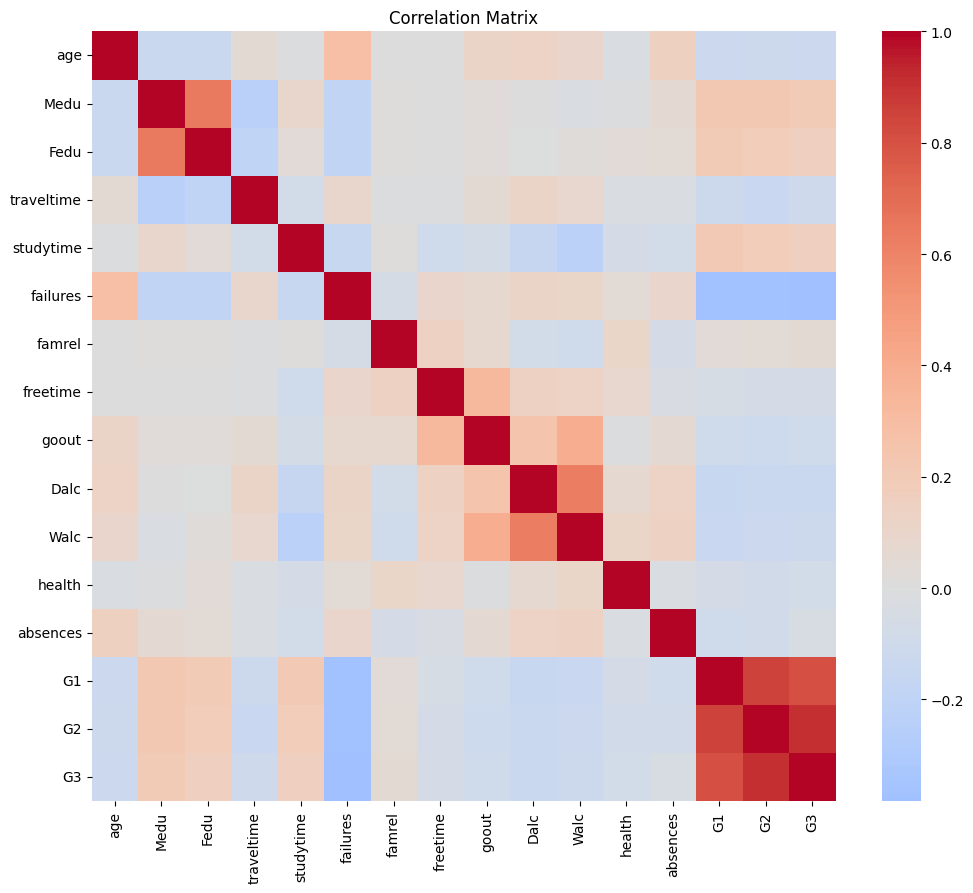

In [30]:
# Correlation plot
plt.figure(figsize=(12, 10))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [31]:
# Feature engineering
data = create_interaction_terms(data)

In [32]:
# Split data into training and testing sets
train_data, test_data = split_data(data, 0.8)

In [33]:
# Prepare features and target
X_train = train_data.drop('G3', axis=1)
y_train = train_data['G3']
X_test = test_data.drop('G3', axis=1)
y_test = test_data['G3']

In [34]:
# Convert categorical variables to dummy variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [35]:
# Align test columns with train columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [36]:
# Build models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=123),
    'Gradient Boosting': GradientBoostingRegressor(random_state=123, verbose=0),
    'Bagging': BaggingRegressor(random_state=123)
}

In [37]:
# Train models and make predictions
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")

Linear Regression RMSE: 1.3699
Random Forest RMSE: 1.6483
Gradient Boosting RMSE: 1.4934
Bagging RMSE: 1.6419


In [38]:
# Create a dataframe for RMSE values
rmse_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])
rmse_df['Highlight'] = rmse_df['Model'].apply(lambda x: 'Yes' if x == 'Random Forest' else 'No')

/tmp/ipython-input-39-3590493746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rmse_df, x='Model', y='RMSE', palette=['skyblue' if x == 'No' else 'red' for x in rmse_df['Highlight']])


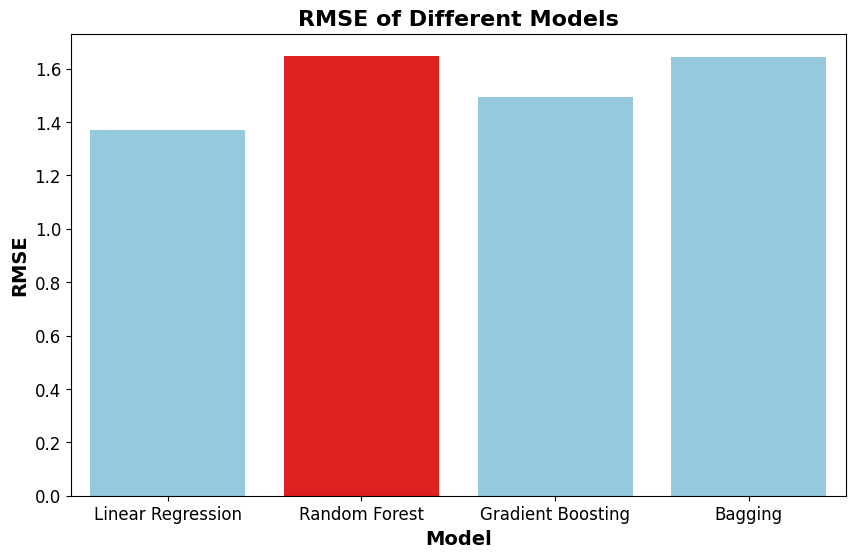

In [39]:
# Plot the RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_df, x='Model', y='RMSE', palette=['skyblue' if x == 'No' else 'red' for x in rmse_df['Highlight']])
plt.title('RMSE of Different Models', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('RMSE', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()